In [1]:
import numpy as np
import jupyter
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot 
import random

In [2]:
#compute the logisticRegression Loss
def loss(w, x, y):
    loss_r=0
    xnum=x.shape[1]
    z=1./(1+np.exp( -np.dot(w.T,x)))
    loss_r=-1/xnum *(np.dot(np.log(z),y.T)+np.dot(np.log(1.0-z),(1-y).T))
    return loss_r

In [3]:
#compute the gradient
def gradient(w,x,y):
    grad_num=10
    xnum=x.shape[1]
    index=random.sample(range(0,xnum),grad_num)
    x_eg=x[:,index]
    y_eg=y[:,index] 
    grad = np.zeros(w.shape)  
    z= 1./(1+np.exp( -np.dot(w.T ,x)))
    z_eg=z[:,index]
    dz = z_eg-y_eg
    grad = 1/xnum * np.dot(x_eg, dz.T) 
    return grad

In [4]:
def sigmoid(W , X, y ,threshold):
    z= np.dot(W.T ,X)
    temp= 1./(1+np.exp( -z))
    y_pred=np.zeros(temp.shape)
    y_pred[temp> threshold]=1;
    y_pred[temp<=threshold]=0;
    cmp=y_pred==y
    accuracy=len(cmp[cmp==True])/y.shape[1]
    return y_pred,accuracy 

In [5]:
# NAG method
def nag(W,x_train,y_train,x_test,y_test,alpha,iterations):
    pre_d = np.zeros_like(W)
    pre_grad = np.zeros_like(W)
    gamma =0.9 # momentum factor 
    loss_nag =[]
    loss_nag_train=[]
    for t in range(iterations):     
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_nag.append (loss_validation)
        loss_nag_train.append(loss_validation)
        # udate parameter
        d  = gamma * pre_d  + grad + gamma * (grad - pre_grad)
        dW = -alpha * d
        W += dW 
        pre_d = d
        pre_grad = grad
    
    loss_nag=np.array(loss_nag)
    loss_nag=loss_nag[:,:,0]
    loss_nag_train=np.array(loss_nag_train)
    loss_nag_train=loss_nag_train[:,:,0]
    y_pred_NAG_train,training_accuracy_NAG =sigmoid(W , x_train, y_train ,threshold)
    y_pred_NAG_test,test_accuracy_NAG=sigmoid(W , x_test, y_test ,threshold)
    return loss_nag,loss_nag_train,test_accuracy_NAG,training_accuracy_NAG


In [6]:
# RMSProp method
def rmsprop(W,x_train,y_train,x_test,y_test,alpha,iterations):
    n = np.zeros((x_train.shape[0],y_train.shape[0]))
    gamma =0.9 
    epsilon = 0.001
    loss_rms =[] 
    loss_rms_train=[]
    for i in range(iterations):
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_rms.append (loss_validation)
        loss_rms_train.append(loss_train)
        # update parameter
        n = gamma * n + (1-gamma) * np.power(grad,2)
        dW = -alpha /np.sqrt(n + epsilon ) * grad
        W += dW 
    
    loss_rms=np.array(loss_rms)
    loss_rms=loss_rms[:,:,0]
    loss_rms_train=np.array(loss_rms_train)
    loss_rms_train=loss_rms_train[:,:,0]
    y_pred_RMSProp_train,training_accuracy_RMSProp =sigmoid(W , x_train, y_train ,threshold)
    y_pred_RMSProp_test,test_accuracy_RMSProp =sigmoid(W , x_test, y_test ,threshold)
    return loss_rms,loss_rms_train,test_accuracy_RMSProp,training_accuracy_RMSProp

In [7]:
# AdaDelta method
def adaDelta(W,x_train,y_train,x_test,y_test,iterations):    
    E_g2 = np.zeros_like(W)
    E_dW2 = np.zeros_like(W)
    gamma =0.95 
    epsilon = 1e-3# 
    loss_adad =[]  
    loss_adad_train=[]
    for t in range(iterations):

        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_adad.append (loss_validation)
        loss_adad_train.append(loss_train)
        # update parameter
        E_g2 = gamma * E_g2 + (1-gamma) * np.power(grad,2)
        dW = - np.sqrt(E_dW2+epsilon) / np.sqrt(E_g2+epsilon) * grad    
        W += dW 
        E_dW2 = gamma * E_dW2 + (1-gamma) * np.power(dW , 2)
    
    loss_adad=np.array(loss_adad)
    loss_adad=loss_adad[:,:,0]
    loss_adad_train=np.array(loss_adad_train)
    loss_adad_train=loss_adad_train[:,:,0]
    y_pred_AdaDelta_train,training_accuracy_AdaDelta =sigmoid(W , x_train, y_train ,threshold)
    y_pred_AdaDelta_test,test_accuracy_AdaDelta =sigmoid(W , x_test, y_test ,threshold)
    return loss_adad,loss_adad_train,test_accuracy_AdaDelta,training_accuracy_AdaDelta

In [8]:
# Adam method
def adam(W,x_train,y_train,x_test,y_test,alpha,iterations):  
    n = np.zeros_like(W)
    m = np.zeros_like(W)
    beta = 0.9 
    gamma = 0.999  
    epsilon = 1e-3 
    loss_adam=[]  
    loss_adam_train=[]
    for i in range(iterations):
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_adam.append (loss_validation)
        loss_adam_train.append(loss_train)
        # update paratemer
        m = beta * m + (1-beta) * grad 
        n = gamma  * n + (1-gamma) * np.power(grad,2) 
        m_hat = m / (1-np.power(beta,i)+epsilon) 
        n_hat = n / (1-np.power(gamma,i)+epsilon)
        W -= m_hat * alpha /(np.sqrt(n_hat) + epsilon)   
    loss_adam=np.array(loss_adam)
    loss_adam=loss_adam[:,:,0]
    loss_adam_train=np.array(loss_adam_train)
    loss_adam_train=loss_adam_train[:,:,0]
    y_pred_Adam_train,training_accuracy_Adam =sigmoid(W , x_train, y_train ,threshold)
    y_pred_Adam_test,test_accuracy_Adam =sigmoid(W , x_test, y_test ,threshold)
    return loss_adam,loss_adam_train,test_accuracy_Adam,training_accuracy_Adam
    


In [9]:
# Load the experiment data
x_train, y_train = load_svmlight_file("a9a")
x_test, y_test = load_svmlight_file("a9a_test")

x_train=x_train.toarray()
x_train=np.column_stack((x_train,np.ones([x_train.shape[0],1]))) #add bias 
x_train=x_train.T
y_train=y_train.reshape(1,len(y_train)) 
y_train=y_train.astype(np.int)  # float->int
y_train[y_train== -1]=0

x_test=x_test.toarray()
x_test=np.column_stack((x_test,np.ones([x_test.shape[0],1]))) #add bias 
x_test=np.column_stack((x_test,np.ones([x_test.shape[0],1]))) #add bias 
x_test=x_test.T
y_test=y_test.reshape(1,len(y_test)) 
y_test=y_test.astype(np.int)  # float->int
y_test[y_test== -1]=0

In [10]:
# Initialize parameter   
iterations=1000
alpha_nag = 0.5# learning rate
alpha_rms=0.5
alpha_adam=0.05
threshold=0.5 # mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative.
W = np.zeros((x_train.shape[0],y_train.shape[0])) # weights
loss_nag,loss_nag_train,accuracy_nag,accuracy_nag_train=nag(W,x_train, y_train, x_test, y_test,alpha_nag,iterations)
W = np.zeros((x_train.shape[0],y_train.shape[0])) # weights
loss_rms,loss_rms_train,accuracy_rms,accuracy_rms_train=rmsprop(W,x_train, y_train, x_test, y_test,alpha_rms,iterations)
W = np.zeros((x_train.shape[0],y_train.shape[0])) # weights
loss_adad,loss_adad_train,accuracy_adad,accuracy_adad_train=adaDelta(W,x_train, y_train, x_test, y_test,iterations)
W = np.zeros((x_train.shape[0],y_train.shape[0])) # weights
loss_adam,loss_adam_train,accuracy_adam,accuracy_adam_train=adam(W,x_train, y_train, x_test, y_test,alpha_adam,iterations)

training accuracy_nag= 0.7591904425539756   testing accuracy_nag= 0.7637737239727289

training accuracy_rms= 0.7773102791683302   testing accuracy_rms= 0.7813402125176586

training accuracy_adad= 0.7591904425539756   testing accuracy_adad= 0.7637737239727289

training accuracy_adam= 0.8284450723257886   testing accuracy_adam= 0.8298016092377618


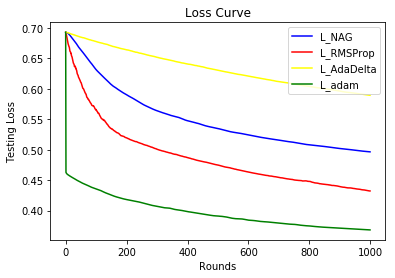

In [14]:
print('training accuracy_nag=',accuracy_nag_train,'  testing accuracy_nag=',accuracy_nag)
print('\ntraining accuracy_rms=',accuracy_rms_train,'  testing accuracy_rms=',accuracy_rms)
print('\ntraining accuracy_adad=',accuracy_adad_train,'  testing accuracy_adad=',accuracy_adad)
print('\ntraining accuracy_adam=',accuracy_adam_train,'  testing accuracy_adam=',accuracy_adam)
pyplot.plot(loss_nag,'blue',label='L_NAG')
pyplot.plot(loss_rms,'red',label='L_RMSProp')
pyplot.plot(loss_adad,'yellow',label='L_AdaDelta')
pyplot.plot(loss_adam,'green',label='L_adam')
pyplot.title('Loss Curve') # give plot a title
pyplot.xlabel('Rounds')# make axis labels
pyplot.ylabel('Testing Loss')
pyplot.legend()
pyplot.show()

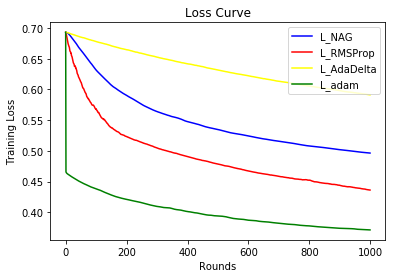

In [15]:
pyplot.plot(loss_nag_train,'blue',label='L_NAG')
pyplot.plot(loss_rms_train,'red',label='L_RMSProp')
pyplot.plot(loss_adad_train,'yellow',label='L_AdaDelta')
pyplot.plot(loss_adam_train,'green',label='L_adam')
pyplot.title('Loss Curve') # give plot a title
pyplot.xlabel('Rounds')# make axis labels
pyplot.ylabel('Training Loss')
pyplot.legend()
pyplot.show()